## Project 3
### Part 1: Imbalanced Dataset

Working with an imbalanced Dataset. The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. The aim is to detect fraudlent transactions.

### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Feel free to import any other packages you'd like to
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn import metrics


### **Data Preprocessing and Exploration**
Download the Kaggle Credit Card Fraud data set. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### **1.1 Examining the class Imbalance**

In [5]:
## observations in this dataset
print("# of observations in this dataset:", len(raw_df))
#positive labels:
print('# of positive labels:', len(raw_df.loc[raw_df['Class']==1]))
#negative labels:
print('# of negative labels:', len(raw_df.loc[raw_df['Class']==0]))


# of observations in this dataset: 284807
# of positive labels: 492
# of negative labels: 284315


#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. We are not sure what the time column actually means so drop the Time column. The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range.

In [6]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)


**1.2.1 Split the dataset into development and test sets. Please set test size as 0.2 and random state as 42. Print the shape of development and test features**

In [7]:
# from sklearn.model_selection import train_test_split # Import train_test_split function
df_X = cleaned_df.drop(columns = ['Class'], axis = 1)
df_y = cleaned_df['Class']

## use stratified splitting since the data is imbalanced. (as also discussed on Ed, we can choose any splitting method)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,stratify = df_y,test_size=0.2, random_state=42)

print('development features shape:', X_train.shape)
print('test featrues shape:', X_test.shape)


development features shape: (227845, 29)
test featrues shape: (56962, 29)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [8]:
# Your Code Here
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_test = scaler.transform(X_test)         # Transform X_test


#### **1.3 Defining Model and Performance Metrics**

In [9]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score


**1.3.1 First, fit a default Decision tree classifier. ( use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [10]:
# Your Code here
clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)

# y_pred_train = clf.predict(X_train)
scores = cross_validate(clf, X_train, y_train,scoring = ['average_precision','roc_auc'],cv = 5)

precision_train = scores['test_roc_auc']
auc_train = scores['test_average_precision']
avg_precision_train = sum(precision_train)/len(precision_train)
avg_auc_train = sum(auc_train)/len(auc_train)

## we fit the model here so later we don't need to fit again when plotting confusion matrix
## the same reason for the other three models below:
clf = clf.fit(X_train,y_train)
print('Average precision score on development set(train):', precision_train)
print('AUC score on development set(train):',auc_train)
print('Avg of precision:', avg_precision_train, 'Avg of auc:',avg_auc_train)


Average precision score on development set(train): [0.88756328 0.88400873 0.81260522 0.77454358 0.82104149]
AUC score on development set(train): [0.62653551 0.71014615 0.60399496 0.58692296 0.68112078]
Avg of precision: 0.8359524571279693 Avg of auc: 0.641744070059615


**1.3.2 Perform random oversampling on the development dataset.**
(Set random state as 42 when performing oversampling)

In [11]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import RandomOverSampler 


In [14]:
# !pip install -U imbalanced-learn 
ros = RandomOverSampler(random_state = 42)
X_train_oversample, y_train_oversample = ros.fit_resample(X_train,y_train)
print(X_train.shape)
print(X_train_oversample.shape)

y_train_oversample.value_counts()

(227845, 29)
(454902, 29)


0    227451
1    227451
Name: Class, dtype: int64

In [15]:
print('# of positive labels:', len(y_train_oversample.loc[y_train_oversample==1])) 
print('# of negative labels:', len(y_train_oversample[y_train_oversample==0]))


# of positive labels: 227451
# of negative labels: 227451


**1.3.3 Repeat 1.3.1 using the dataset you created in the above step(1.3.2 Random oversampling).**

In [16]:
# Your Code here
clf_oversample = DecisionTreeClassifier(max_depth = 10, random_state = 42)

scores = cross_validate(clf_oversample, X_train_oversample, y_train_oversample,scoring = ['average_precision','roc_auc'],cv = 5)

precision_train_oversample = scores['test_roc_auc']
auc_train_oversample = scores['test_average_precision']

avg_precision_train_oversample = sum(precision_train_oversample)/len(precision_train_oversample)
avg_auc_train_oversample = sum(auc_train_oversample)/len(auc_train_oversample)

clf_oversample = clf_oversample.fit(X_train_oversample,y_train_oversample)

print('Average precision score on development set(train_oversample):', precision_train_oversample)
print('AUC score on development set(train_oversample):',auc_train_oversample)
print('Avg of precision_oversample:', avg_precision_train_oversample, 'Avg of auc_oversample:',avg_auc_train_oversample)


Average precision score on development set(train_oversample): [0.99886808 0.99929956 0.99900977 0.99926441 0.99932258]
AUC score on development set(train_oversample): [0.99816396 0.99884446 0.99826911 0.9986672  0.99874564]
Avg of precision_oversample: 0.9991528810903473 Avg of auc_oversample: 0.9985380738652964


**1.3.4 Perform Random undersampling on the development dataset.**

What many positive and negative labels after random undersampling?
What is the shape of development dataset?
(Set random state as 42 when performing undersampling)

In [17]:
rus = RandomUnderSampler(random_state = 42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train,y_train)
print(X_train.shape)
print(X_train_undersample.shape)

y_train_undersample.value_counts()


(227845, 29)
(788, 29)


0    394
1    394
Name: Class, dtype: int64

In [18]:
print('# of positive labels:', len(y_train_undersample.loc[y_train_undersample==1])) 
print('# of negative labels:', len(y_train_undersample[y_train_undersample==0]))


# of positive labels: 394
# of negative labels: 394


**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling). (max_depth=10 and random_state=42)**

In [19]:
# Your Code here
clf_undersample = DecisionTreeClassifier(max_depth = 10, random_state = 42)

scores = cross_validate(clf_undersample, X_train_undersample, y_train_undersample,scoring = ['average_precision','roc_auc'],cv = 5)

precision_train_undersample = scores['test_roc_auc']
auc_train_undersample = scores['test_average_precision']

avg_precision_train_undersample = sum(precision_train_undersample)/len(precision_train_undersample)
avg_auc_train_undersample = sum(auc_train_undersample)/len(auc_train_undersample)

clf_undersample = clf_undersample.fit(X_train_undersample,y_train_undersample)

print('Average precision score on development set(train_undersample):', precision_train_undersample)
print('AUC score on development set(train_undersample):',auc_train_undersample)
print('Avg of precision_undersample:', avg_precision_train_undersample, 'Avg of auc_undersample:',avg_auc_train_undersample)


Average precision score on development set(train_undersample): [0.93662875 0.94936709 0.9097901  0.92583577 0.92989289]
AUC score on development set(train_undersample): [0.91336577 0.92661432 0.86678359 0.90629539 0.89830283]
Avg of precision_undersample: 0.9303029182535673 Avg of auc_undersample: 0.9022723811037444



**1.3.6 Perform Synthetic Minority Oversampling Technique(SMOTE) on the development dataset**

What many positive and negative labels after performing SMOTE?
What is the shape of development dataset? ( Set random state as 42 when performing SMOTE)

In [20]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)
print(X_train.shape)
print(X_train_sm.shape)

y_train_sm.value_counts()


(227845, 29)
(454902, 29)


0    227451
1    227451
Name: Class, dtype: int64

In [22]:
print('# of positive labels:', len(y_train_sm.loc[y_train_sm==1])) 
print('# of negative labels:', len(y_train_sm[y_train_sm==0]))


# of positive labels: 227451
# of negative labels: 227451


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.6 SMOTE). (max_depth=10 and random_state=42)**

In [23]:
clf_sm = DecisionTreeClassifier(max_depth = 10, random_state = 42)


# y_pred_train_sm = clf_sm.predict(X_train_sm)
scores = cross_validate(clf_sm, X_train_sm, y_train_sm,scoring = ['average_precision','roc_auc'],cv = 5)

precision_train_sm = scores['test_roc_auc']
auc_train_sm = scores['test_average_precision']

avg_precision_train_sm = sum(precision_train_sm)/len(precision_train_sm)
avg_auc_train_sm = sum(auc_train_sm)/len(auc_train_sm)

clf_sm = clf_sm.fit(X_train_sm,y_train_sm)

print('Average precision score on development set(train_sm):', precision_train_sm)
print('AUC score on development set(train_sm):',auc_train_sm)
print('Avg of precision_sm:', avg_precision_train_sm, 'Avg of auc_undersample:',avg_auc_train_sm)


Average precision score on development set(train_sm): [0.99757923 0.99738426 0.99772842 0.9972463  0.99714931]
AUC score on development set(train_sm): [0.99667622 0.99645425 0.99685462 0.99619248 0.99611009]
Avg of precision_sm: 0.9974175030591891 Avg of auc_undersample: 0.9964575330041552


**1.3.8 Make predictions on the test set using the four models and report AUC values.**

In [24]:
## default decision tree
y_pred_test = clf.predict(X_test)
auc_test = metrics.roc_auc_score(y_test,y_pred_test)
print('AUC score on test set:',auc_test)

## oversample
y_pred_test_oversample = clf_oversample.predict(X_test)
auc_test_oversample = metrics.roc_auc_score(y_test,y_pred_test_oversample)
print('AUC score on test set(oversample):',auc_test_oversample)

## undersample
y_pred_test_undersample = clf_undersample.predict(X_test)
auc_test_undersample = metrics.roc_auc_score(y_test,y_pred_test_undersample)
print('AUC score on test set(undersample):',auc_test_undersample)

## SMOTE
y_pred_test_sm = clf_sm.predict(X_test)
auc_test_sm = metrics.roc_auc_score(y_test,y_pred_test_sm)
print('AUC score on test set(sm):',auc_test_sm)


AUC score on test set: 0.8774455054953889
AUC score on test set(oversample): 0.8983306392337465
AUC score on test set(undersample): 0.914460782906297
AUC score on test set(sm): 0.9059496055034282


**1.3.9 Plot Confusion Matrices for all the four models on the test set.**

/Users/shijia_huang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/shijia_huang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/shijia_huang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 

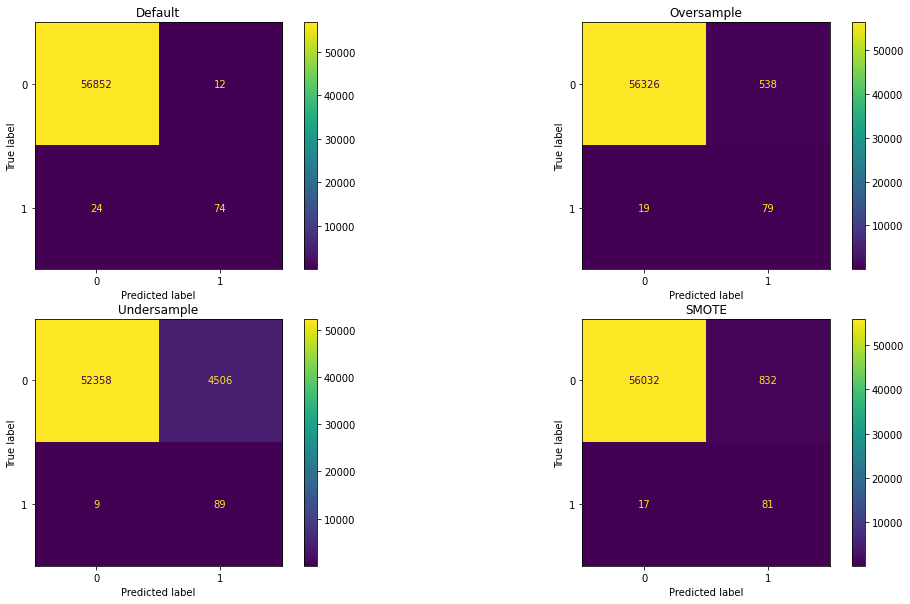

In [31]:
import matplotlib.pyplot as plt ## reimport it since plt might have been used before
fig, ax = plt.subplots(2,2,figsize=(18, 10))
plot_confusion_matrix(clf,X_test, y_test,ax = ax[0,0])
plot_confusion_matrix(clf_oversample,X_test, y_test,ax = ax[0,1])
plot_confusion_matrix(clf_undersample,X_test, y_test,ax = ax[1,0])
plot_confusion_matrix(clf_sm,X_test, y_test,ax = ax[1,1])
ax[0,0].title.set_text('Default')
ax[0,1].title.set_text('Oversample')
ax[1,0].title.set_text('Undersample')
ax[1,1].title.set_text('SMOTE')


**1.3.10 Plot ROC for all the four models on the test set in a single plot. Make sure you label axes and legend properly. Comment your results**

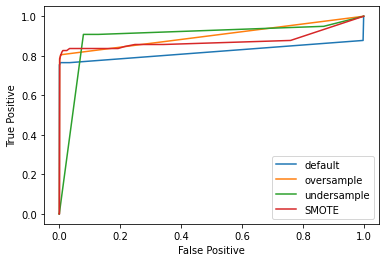

In [32]:
# fig, ax = plt.subplots(2,2,figsize=(18, 10));
plt.figure(0).clf()

## default
y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_test, y_pred_prob,pos_label = 1)
# disp = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr)
plt.plot(fpr, tpr, label = "default")

## oversample
y_pred_prob_oversample = clf_oversample.predict_proba(X_test)[:,1]
fpr_oversample,tpr_oversample,thresholds_oversample = metrics.roc_curve(y_test, y_pred_prob_oversample,pos_label = 1)
disp_oversample = metrics.RocCurveDisplay(fpr = fpr_oversample, tpr = tpr_oversample)
plt.plot(fpr_oversample, tpr_oversample, label = "oversample")

## undersample
y_pred_prob_undersample = clf_undersample.predict_proba(X_test)[:,1]
fpr_undersample,tpr_undersample,thresholds_undersample = metrics.roc_curve(y_test, y_pred_prob_undersample,pos_label = 1)
disp_undersample = metrics.RocCurveDisplay(fpr = fpr_undersample, tpr = tpr_undersample)
plt.plot(fpr_undersample, tpr_undersample, label = "undersample")

## SMOTE
y_pred_prob_sm = clf_sm.predict_proba(X_test)[:,1]
fpr_sm,tpr_sm,thresholds = metrics.roc_curve(y_test, y_pred_prob_sm,pos_label = 1)
disp_sm = metrics.RocCurveDisplay(fpr = fpr_sm, tpr = tpr_sm)
plt.plot(fpr_sm, tpr_sm, label = "SMOTE")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()


**1.3.11 Train a balanced default Decision tree classifier. (use max_depth=10 and random_state=42). ( balance the class weights). Print the AUC and average precision on dev set**

In [27]:
# Your code here
clf_balanced = DecisionTreeClassifier(max_depth = 10,random_state = 42, class_weight = 'balanced')
clf_balanced= clf_balanced.fit(X_train,y_train)
y_pred_train_balanced = clf_balanced.predict(X_test)

precision_train_balanced= metrics.average_precision_score(y_test,y_pred_train_balanced)
auc_train_balanced = metrics.roc_auc_score(y_test,y_pred_train_balanced)

print('Average precision score on development set(train_undersample):', precision_train_balanced)
print('AUC score on development set(train_undersample):',auc_train_balanced)

Average precision score on development set(train_undersample): 0.10900876640241645
AUC score on development set(train_undersample): 0.8986032194250801


**1.3.12 Plot confusion matrix on test set using the above model**

Confusion Matrix for balanced model


/Users/shijia_huang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


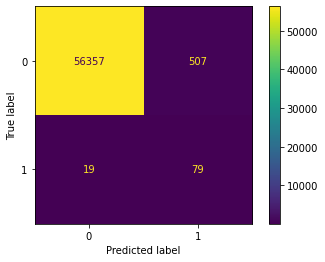

In [37]:
# Your code here
print('Confusion Matrix for balanced model:')
plot_confusion_matrix(clf_balanced,X_test, y_test)


The confusion matrix of a balanced tree shows that it performs better than the default decision tree model on False Negative rate. However, it has more False Positive. In this case, we care more about the Recall rate since a false negative(a fraud that is not detected) brings more cost to a credit card system. Therefore, we may need to take this issue in consideration when choosing models.  